<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Camilo Maldonado - 201573013-K </H3>
<H3 align='center'> Diego Córdova - 201403009-6 </H3>

**Temas**  
* Manipulaciones básicas en numpy
* Preprocesamiento y exploración de datos, creación de datos sinteticos
* Regresión Lineal Regularizada: _Ridge_ y _Lasso_
* SVM y Kernels
* Más _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ (en caso de ser repositorio privado, invitar como colaborador al usuario de github "avalderr") al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea2]
* Fecha de entrega y presentaciones: 31 de Mayo. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en dos partes:

[1.](#primero) Clasificación de datos no-linealmente separables  
[2.](#tercero) Regularización para regresión   

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ por ejemplo.

<a id="primero"></a>
## 1. Clasificación de datos no-linealmente separables

Algunos modelos de clasificación buscan implicita o explicitamente separar los datos linealmente, es decir ajustar un hiperplano que separe en 2 subespacios el espacio de las variables, separando ambas clases del _target_. Sin embargo en la mayoría de los casos reales esto resulta imposible. Esto no significa que no podamos ajustar modelos con estos datos o buscar transformaciones que nos permitan utilizarlos. 
    
![Alt Text](http://people.cs.uchicago.edu/~dinoj/manifold/swissroll.gif) 

[comment]: <> (Swiss Roll)

En esta primera parte de la tarea crearemos manualmente un set de datos categóricos no linealmente separables. Este se conformará de puntos en $\mathbb{R}^2$, pertenecientes a una de dos categorías etiquetadas 0 o 1, los cuales se encuentran "anidados". Probaremos distintas aproximaciones lineales y no lineales y compararemos sus desempeños.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

#### 1.a Creando los datos
La función `do_circles` retorna un conjunto de puntos etiquetados, donde la etiqueta 0 corresponde a puntos siguiendo una circunferencia (con un ruido asociado) y la etiqueta 1 a puntos dentro de esa circunferencia.

Los parametros de esta función tienen nombres intencionalmente no descriptivos. Analise la función y comente interpretación puede darle a cada uno de los parámetros con respecto a la influencia que tendrán en el set de datos obtenidos. Si lo estima conveniente, cambie el nombre de los parámetros a nombres más descriptivos.

In [0]:
# cf -> Laps around the circle
# scr -> The ratio of circle's radio for inner points
# ns -> Standar deviation for a Normal Distribution 

def do_circles(n_dots = 3000, ns = 0.15, scr = 0.3, cf = 1):
    generator = check_random_state(42)
    
    # cf is for number of turns of the circle
    linspace = np.linspace(0, 2*cf*np.pi, n_dots)

    # Points around circle
    circle_x = np.cos(linspace)
    circle_y = np.sin(linspace)

    # Half of points for inner and other half for perimeter
    inner_circle_x, outer_circle_x, inner_circle_y, outer_circle_y = train_test_split(circle_x, circle_y, test_size = 0.5)
    
    # Move the inner points to the center of the circle
    inner_circle_x , inner_circle_y = inner_circle_x*scr , inner_circle_y*scr 

    # Creates matrix (n_dots x 2), where the first half are outer points    
    X = np.vstack((np.append(outer_circle_x, inner_circle_x),np.append(outer_circle_y, inner_circle_y))).T

    # Target vector. Zeros for outer points and 1 for inner
    y = np.hstack([
        np.zeros(n_dots // 2, dtype=np.intp),
        np.ones(n_dots // 2, dtype=np.intp)
    ])

    # Add noise from Normal distribution. Mean = 0 and Standard deviation = ns.
    X += generator.normal(scale = ns, size = X.shape)
    
    
    return train_test_split(X, y, test_size=0.3, random_state=42)

#### 1.b Graficar los datos
Cree una función que grafíque los datos, coloreando distintamente los puntos de cada clase. 
Utilice esta función para verificar gráficamente lo que propuso en la pregunta anterior.

In [0]:
def plot_circles(n=3000,ds=0.15,r=0.3,laps=1):

    X_train, X_test, y_train, y_test = do_circles(n,ds,r,laps)
    fig = plt.figure(figsize=(6.,3.))
    fig1 = fig.add_subplot(121)
    fig1.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],c='r')
    fig1.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],c='b')
    fig1.set_title("Train Set")
    
    fig2 = fig.add_subplot(122)
    fig2.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],c='r')
    fig2.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],c='b')
    fig2.set_title("Test Set")
    plt.show()

0.0


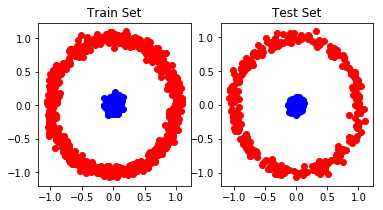

0.2222222222222222


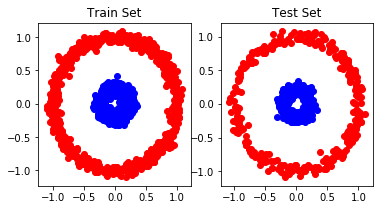

0.4444444444444444


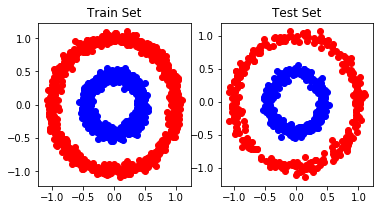

0.6666666666666666


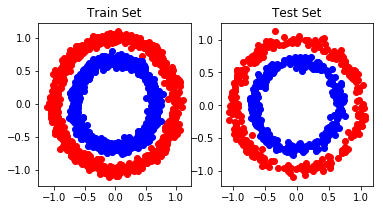

0.8888888888888888


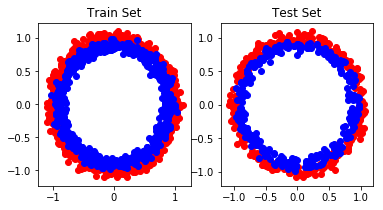

1.1111111111111112


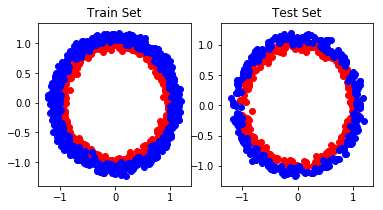

1.3333333333333333


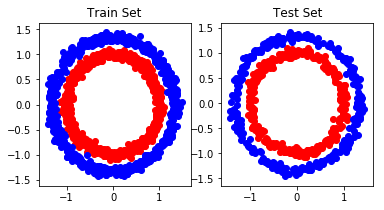

1.5555555555555554


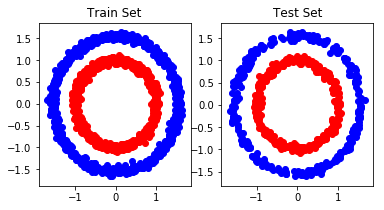

1.7777777777777777


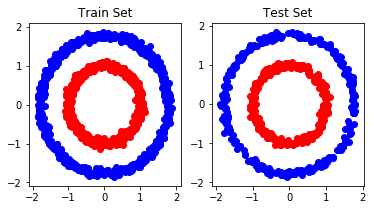

2.0


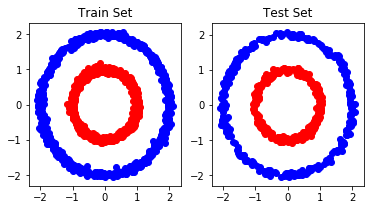

In [0]:
for r in np.linspace(0,2,10):
  print(r)
  plot_circles(2000,0.05,r,1)

##### Datos

Se puede apreciar que el tercer parámetro de la función es el radio de una clase, mientras la otra es siempre 1 (en este caso los puntos rojos), la desviación estandar es que tan variables son frente a la linea del perímetro de las circunferencias. Por último el parámetro final son la cantidad de vueltas al circulo en que se dividen el total de puntos generados. 

#### 1.c Regresión Logística

Realice una regresión logistica para a lo menos 5000 puntos generados con los siguientes parámetros:
* `do_circles(n_dots, 0.2, 0.3, 1)`
* `do_circles(n_dots, 0, 0.3, 1)`

Grafique los datos que está ajustando y calcule el _score_ del regresor logístico en cada caso.
¿Qué valor entrega el _score_ del regresor logístico? ¿Le parece un buen desempeño para la tarea a realizar?

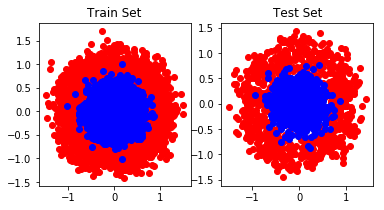

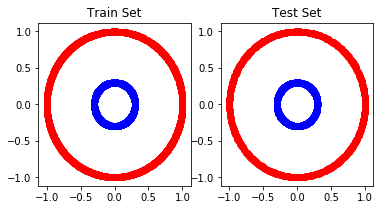

In [0]:
plot_circles(5000,0.2,0.3,1)
plot_circles(5000,0,0.3,1)

In [0]:
from sklearn.linear_model import LogisticRegression



dataAll = list()

c=3
while(c>0):
  dataNoise = list()
  dataClean = list()
  for i in range(100):
    X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    score1 = log_reg.score(X_test,y_test)

    X_train, X_test, y_train, y_test = do_circles(5000,0,0.3,1)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    score2 = log_reg.score(X_test,y_test)

    dataNoise.append(score1)
    dataClean.append(score2)
  c -= 1  
  dataAll.append(dataNoise)
  dataAll.append(dataClean)


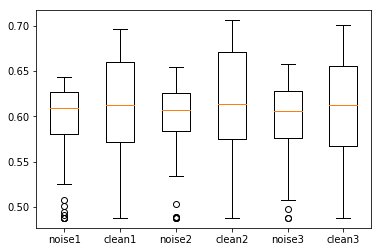

In [0]:
plt.boxplot(dataAll,labels=['noise1','clean1','noise2','clean2','noise3','clean3'])
plt.show()

##### Conclusión
Se observa que los datos sin ruido son exactamente igual su distribución, mientras que los de ruido se ve un claro traslapo entre clases y claramente que no existe una linea de borde que pueda separarlos en 2D manteniendo una generalización para el test data. Luego los score de ambos tipos de datos fueron en todos los casos dispersos , aunque generando los mejores score los datos sin ruido, lo que era lo esperado pero tampoco muestra un comportamiento claro y mejor entre los dos tipos de datos, lo que claramente la visualización de la data nos dice lo contrario, que la separación de clases para el caso de no tener ruido debería ser muy buena si fuera un método correcto para clasificar el problema.

#### 1.d Graficos
Para entender mejor lo que está ocurriendo con el clasificador en cada uno de los casos, grafícaremos los datos clasificados y la frontera de desición ajustada por el modelo. Para esto complete la función siguiente y luego utilicela para ambos modelos y conjuntos de datos ajustados en la pregunta anterior. 

¿Qué puede concluir luego de estas visualizaciones? ¿Es posible mejorar el desempeño de algun clasificador lineal sin hacer una transformación de los datos? ¿Qué ocurre con el clasificador si disminuimos el ruido, mejora realmente su desempeño? 

In [0]:
def plot_classifier(classifier, X_train, Y_train, X_test, Y_test, train_or_test='test'):
    plt.figure(figsize=(6, 3))
    axis = plt.axes()
    if train_or_test == 'train':
        axis.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],c='r')
        axis.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],c='b')
        axis.set_title("Train Set")
    
    elif train_or_test == 'test':
        axis.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],c='r')
        axis.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],c='b')
        axis.set_title("Test Set")
        
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j] # grid for cassifier
    Z = classifier.predict(np.c_[XX.ravel(), YY.ravel()]) # what the classifier predicts over the space
    Z = Z.reshape(XX.shape) # for consistency
    Zplot = Z > 0.5 # to separate both classes
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    plt.show()

Modelo con DS


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


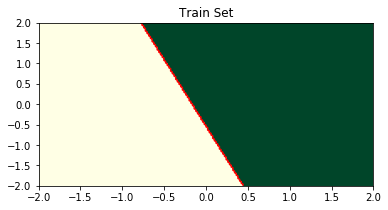

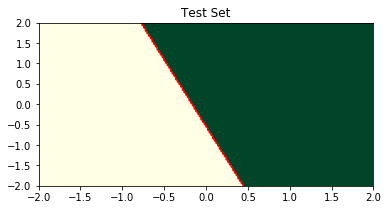

Modelo sin DS


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


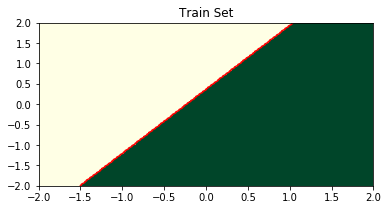

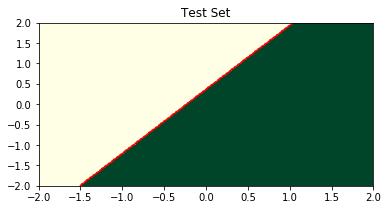

In [0]:
print('Modelo con DS')
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
plot_classifier(log_reg,X_train,y_train,X_test,y_test,'train')
plot_classifier(log_reg,X_train,y_train,X_test,y_test,'test')

print('Modelo sin DS')
X_train, X_test, y_train, y_test = do_circles(5000,0,0.3,1)
log_reg2 = LogisticRegression()
log_reg2.fit(X_train, y_train)
plot_classifier(log_reg2,X_train,y_train,X_test,y_test,'train')
plot_classifier(log_reg2,X_train,y_train,X_test,y_test,'test')

Para las siguientes preguntas nos enfocaremos **solo en la versión con ruido de los datos** pues en la práctica no existen datos sin ruido. Probaremos algunos métodos no lineales para ver que tanto logramos mejorar el desempeño en nuestros datos. 

##### Visualizaciones
Con los datos visualizados más arriba y la frontera de decisiones siendo lineales es claro que no será posible mejorar su rendimiento y que logre separar de manera correcta los datos, los datos noe stán dispuestos a ser separados linealmente sin alguna transformación de esto, por ende mejorar el desempeño de forma segura, no es factible. El ruido no se ve que afecte en buena o mala medida, dado que simplemente ladea un poco más la frontera de decisión y se mueve un poco de acuerdo al centro de ambos círculos, pero al ser un círculo la forma de distribución de los datos, por simetría no hace la gran diferencia, si cambia por la naturaleza estocástica pero no en un "buen camino".

#### 1.e SVM

Entrene un clasificador SVM con los datos con ruido. ¿Qué forma tiene la frontera de desición esta vez? 

¿Mejoran los resultados al alejarse de los metodos puramente lineales? Comente sobre el desempeño del modelo y su sensibilidad a los parámetros `C` y `gamma`, explorando como cambia la frontera de desición al variar estos parámetros. 

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Modelo con SVM


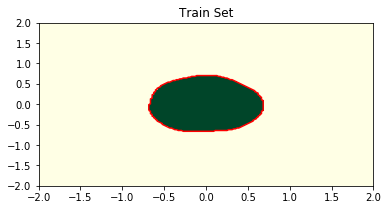

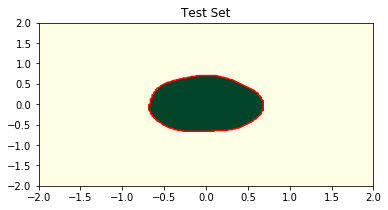

0.9513333333333334


In [0]:
from sklearn.svm import SVC

print('Modelo con SVM')
SV = SVC(C=1, gamma=5)
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
clf = SV
clf.fit(X_train, y_train)
plot_classifier(clf,X_train,y_train,X_test,y_test,'train')
plot_classifier(clf,X_train,y_train,X_test,y_test,'test')
print(clf.score(X_test,y_test))

Modelo con SVM gamma= 0.01


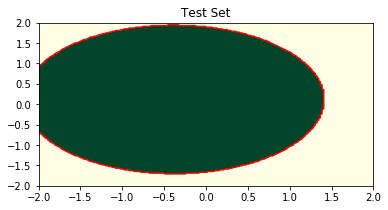

0.49
Modelo con SVM gamma= 1.0621052631578947


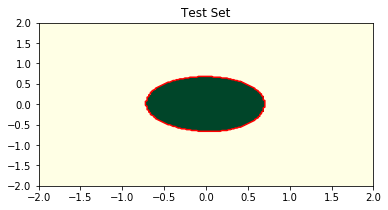

0.9546666666666667
Modelo con SVM gamma= 2.114210526315789


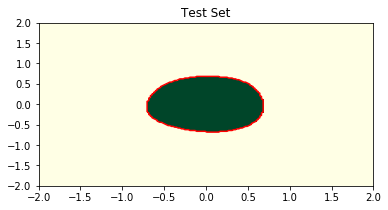

0.9506666666666667
Modelo con SVM gamma= 3.1663157894736838


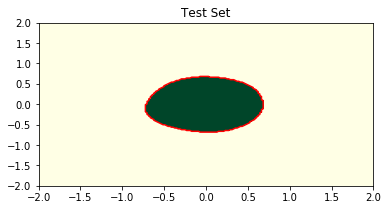

0.9626666666666667
Modelo con SVM gamma= 4.218421052631578


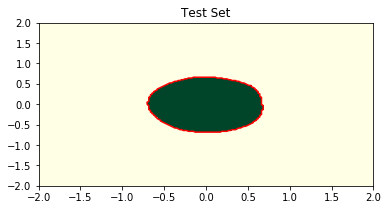

0.9633333333333334
Modelo con SVM gamma= 5.270526315789473


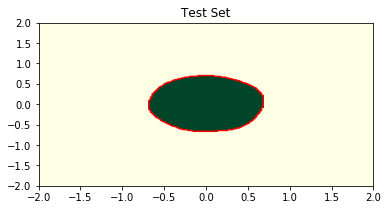

0.9526666666666667
Modelo con SVM gamma= 6.322631578947368


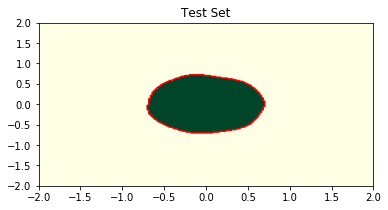

0.95
Modelo con SVM gamma= 7.374736842105262


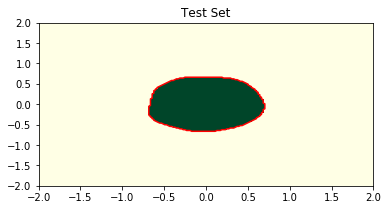

0.9633333333333334
Modelo con SVM gamma= 8.426842105263157


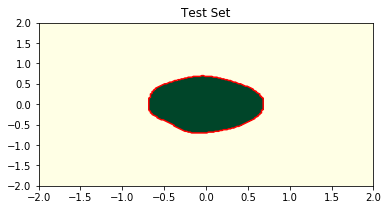

0.9633333333333334
Modelo con SVM gamma= 9.478947368421052


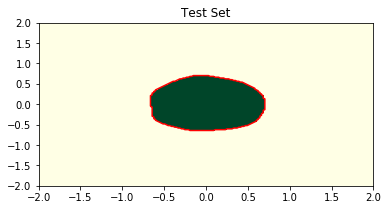

0.9553333333333334
Modelo con SVM gamma= 10.531052631578946


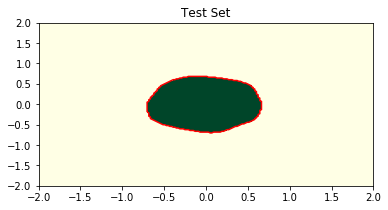

0.9593333333333334
Modelo con SVM gamma= 11.583157894736841


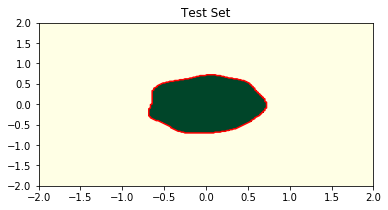

0.9546666666666667
Modelo con SVM gamma= 12.635263157894736


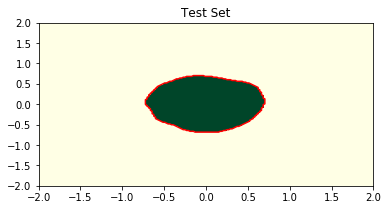

0.9566666666666667
Modelo con SVM gamma= 13.68736842105263


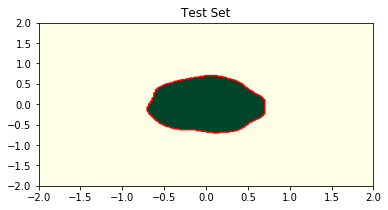

0.9573333333333334
Modelo con SVM gamma= 14.739473684210525


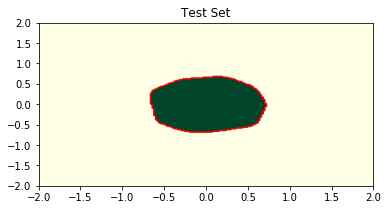

0.9586666666666667
Modelo con SVM gamma= 15.79157894736842


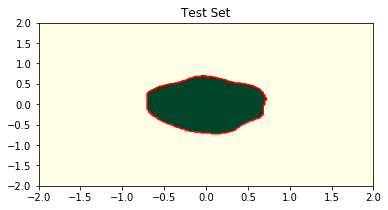

0.956
Modelo con SVM gamma= 16.843684210526316


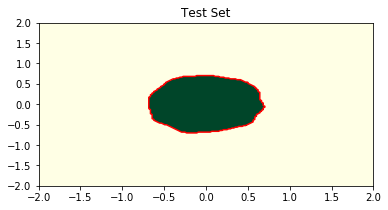

0.956
Modelo con SVM gamma= 17.89578947368421


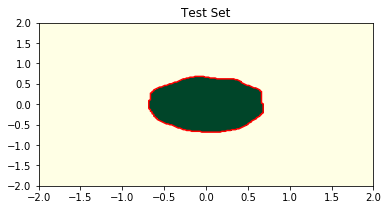

0.958
Modelo con SVM gamma= 18.947894736842105


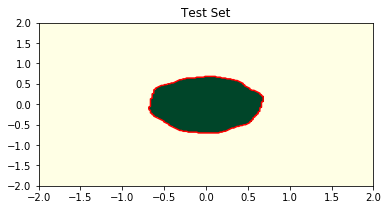

0.956
Modelo con SVM gamma= 20.0


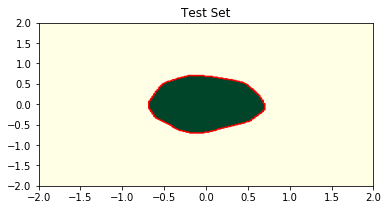

0.958


In [0]:
for g in np.linspace(0.01,20,20):
  print('Modelo con SVM gamma=',g)
  SV = SVC(C=1, gamma=g)
  X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
  clf = SV
  clf.fit(X_train, y_train)
  plot_classifier(clf,X_train,y_train,X_test,y_test,'test')
  print(clf.score(X_test,y_test))

Modelo con SVM c= 0.01


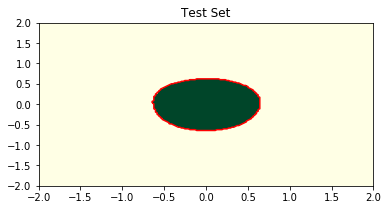

0.954
Modelo con SVM c= 1.0621052631578947


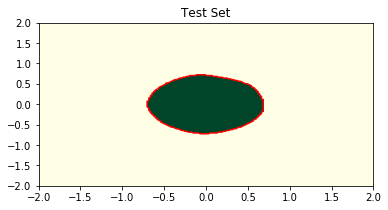

0.9606666666666667
Modelo con SVM c= 2.114210526315789


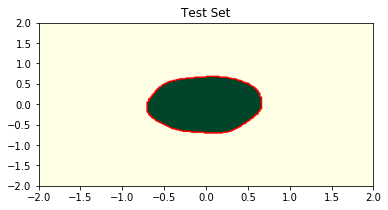

0.9553333333333334
Modelo con SVM c= 3.1663157894736838


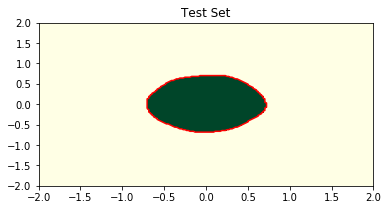

0.962
Modelo con SVM c= 4.218421052631578


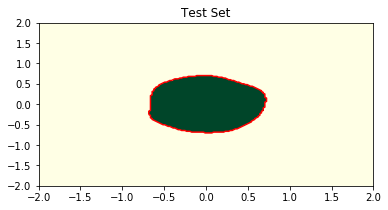

0.954
Modelo con SVM c= 5.270526315789473


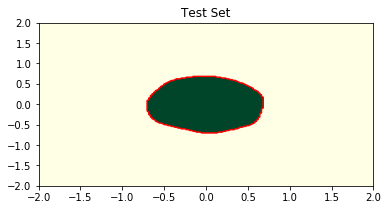

0.962
Modelo con SVM c= 6.322631578947368


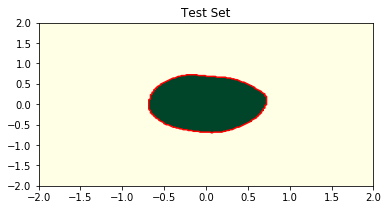

0.9473333333333334
Modelo con SVM c= 7.374736842105262


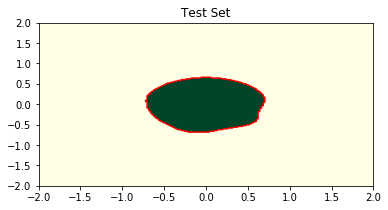

0.9553333333333334
Modelo con SVM c= 8.426842105263157


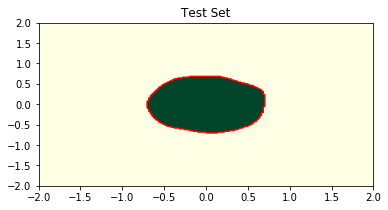

0.958
Modelo con SVM c= 9.478947368421052


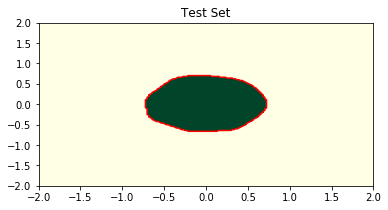

0.9526666666666667
Modelo con SVM c= 10.531052631578946


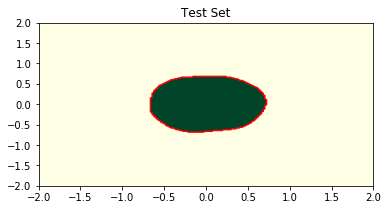

0.9606666666666667
Modelo con SVM c= 11.583157894736841


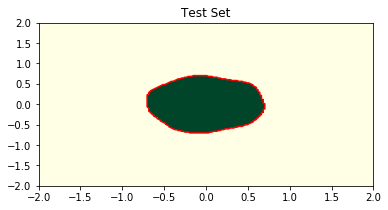

0.9546666666666667
Modelo con SVM c= 12.635263157894736


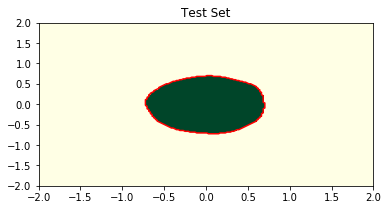

0.954
Modelo con SVM c= 13.68736842105263


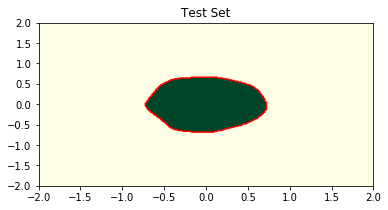

0.9606666666666667
Modelo con SVM c= 14.739473684210525


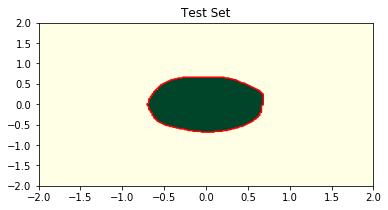

0.954
Modelo con SVM c= 15.79157894736842


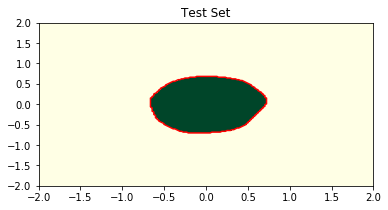

0.952
Modelo con SVM c= 16.843684210526316


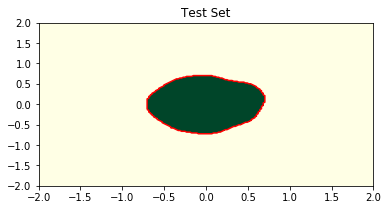

0.9513333333333334
Modelo con SVM c= 17.89578947368421


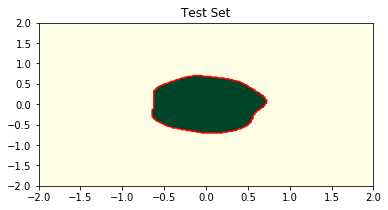

0.9493333333333334
Modelo con SVM c= 18.947894736842105


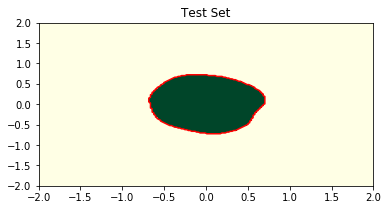

0.9586666666666667
Modelo con SVM c= 20.0


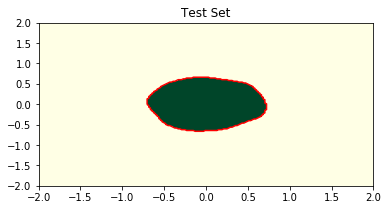

0.95


In [0]:
for c in np.linspace(0.01,20,20):
  print('Modelo con SVM c=',c)
  SV = SVC(C=c, gamma=5)
  X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
  clf = SV
  clf.fit(X_train, y_train)
  plot_classifier(clf,X_train,y_train,X_test,y_test,'test')
  print(clf.score(X_test,y_test))

##### Fronteras
Se ve claramente que es un mucho mejor método para clasificar datos no lineales. Generando una frontera de decisión que tiende a un óvalo o circunferencia. 
El parámetro gamma hace referencia a la lejanía que toma enc uenta para su vector de soporte, entre mayor sea el valor implica un vecindario más pequeño y cerrado, provocando que solo tome en cuenta casi su único dato. Produciendo overfitting que se controla con parámetro C. Cuando es muy pequeño genera un modelo que toma en consideración toda la data y no puede obtener la complejidad de la data. El parámetro C es para el rango de holgura que se desea, entre mayor sea el criterio de margen para la aceptación será menor.


#### 1.f KNN
Pruebe ahora con otro método no linal, _K nearest neighbors_ o KNN. Discuta sus resultados y la frontera de desición que encuentra el modelo. 

Realice un _Cross Validation_ sobre el parámetro `n_neighbors` o `p` (o ambos usando un mallado) y comente si mejoran significativamente los resultados. Puede apoyarse de los códigos de la tarea 1 para realizar el _Cross Validation_.
¿Qué representan estos parámetros para el metodo?

Modelo con KNN


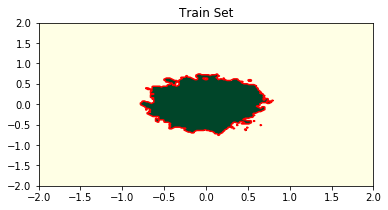

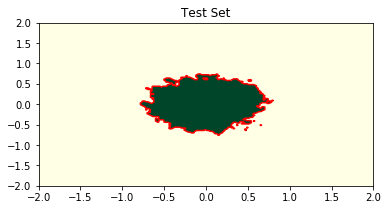

0.9506666666666667


In [0]:
from sklearn.neighbors import KNeighborsClassifier

print('Modelo con KNN')
KNN = KNeighborsClassifier(n_neighbors=5, p=2)
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
clf = KNN
clf.fit(X_train, y_train)
plot_classifier(clf,X_train,y_train,X_test,y_test,'train')
plot_classifier(clf ,X_train,y_train,X_test,y_test,'test')
print(clf.score(X_test,y_test))

#### K-fold

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid_param = {  
    'n_neighbors': [1,5,10,15,20,25,100,500],
    'p': [1,2],#5,10,15,20,25,100,500],
}

KNN = KNeighborsClassifier(n_neighbors=5, p=2)
gd_sr = GridSearchCV(estimator=KNN,param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1)
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
gd_sr.fit(X_train, y_train)  
best_parameters = gd_sr.best_params_  
print(best_parameters)
best_result = gd_sr.best_score_  
print(best_result)  
print(gd_sr)

{'n_neighbors': 10, 'p': 1}
0.9568571428571429
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 100, 500],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)


In [0]:
from sklearn.model_selection import cross_val_score

for n in [1,5,10,15,20,25,100,500]:
  KNN = KNeighborsClassifier(n_neighbors=n)
  X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
  X = np.concatenate((X_train,X_test),axis=0)
  y = np.concatenate((y_train,y_test),axis=0)
  #train model with cv of 5 
  cv_scores = cross_val_score(KNN, X, y, cv=5)
  #print each cv score (accuracy) and average them
  print('n=',n,'  scores:',cv_scores)
  print('av-score: ','cv_scores mean:{}\n\n'.format(np.mean(cv_scores)))

n= 1   scores: [0.928 0.924 0.933 0.932 0.95 ]
av-score:  cv_scores mean:0.9334


n= 5   scores: [0.949 0.94  0.952 0.96  0.958]
av-score:  cv_scores mean:0.9517999999999999


n= 10   scores: [0.959 0.949 0.948 0.948 0.951]
av-score:  cv_scores mean:0.951


n= 15   scores: [0.951 0.955 0.951 0.949 0.954]
av-score:  cv_scores mean:0.952


n= 20   scores: [0.952 0.953 0.94  0.955 0.956]
av-score:  cv_scores mean:0.9512


n= 25   scores: [0.943 0.955 0.957 0.948 0.945]
av-score:  cv_scores mean:0.9496


n= 100   scores: [0.949 0.956 0.955 0.944 0.955]
av-score:  cv_scores mean:0.9517999999999999


n= 500   scores: [0.945 0.944 0.942 0.959 0.953]
av-score:  cv_scores mean:0.9485999999999999




[[0.92914286 0.92885714]
 [0.95085714 0.95257143]
 [0.95685714 0.95457143]
 [0.95342857 0.95514286]
 [0.95485714 0.95542857]
 [0.95428571 0.95571429]
 [0.95485714 0.95485714]
 [0.92714286 0.92971429]]


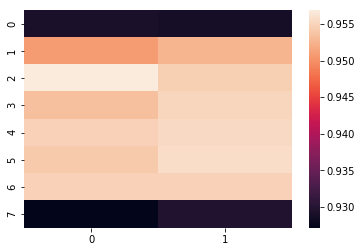

In [0]:
import seaborn as sns

data = gd_sr.cv_results_['mean_test_score'].reshape((8,2))
print(data)
sns.heatmap(data)

##### método KNN
Se puede observar una frontera de decisión mucho menos generalizada, y más enfocada en un punto a punto, es decir busca la forma de frontera que acomode a todos los datos entregados, más que una forma generalizada como el óvalo. Se puede ver que el parámetro p que es para diferenciar que tipo de distancia se usa implica cambio en el desempeño pero a la vez tiene relación con n el número de vecinos considerados, como se peude apreciar en el mapa de calor, donde no muestra que un método de distancia sea siempre mejor que el otro. Por último, la cantidad de vecinos tiene a tener mal desempeño cuando son muy pocos o demasiados, la cantidad para definir "pocos" o "demasiados" son inherentes del problema en cuestión. 

#### 1.g
Del mejor modelo obtenido en el punto anterior, grafíque los datos de test coloreando de manera difente los puntos mal clasificados por su modelo. ¿Por qué el modelo no logra clasificar bien estos puntos? ¿Qué habría ocurrido si estuvieramos utilizando los datos sin ruido?

In [0]:
gd_sr.best_params_ 

{'n_neighbors': 10, 'p': 1}

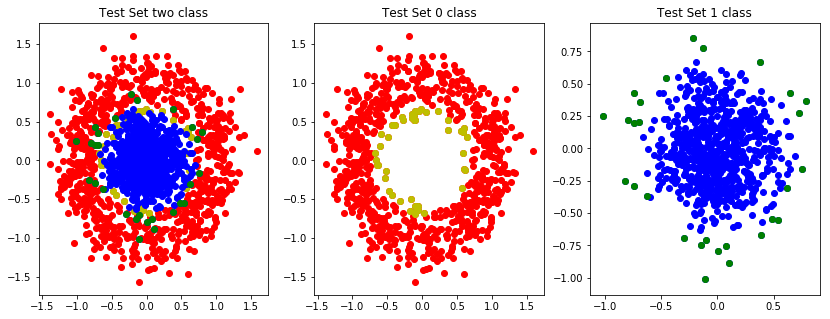

In [0]:
KNN = KNeighborsClassifier(n_neighbors=100, p=2)
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)
# 0 good prediction and 1 for bad
bad_points = X_test[y_predict != y_test]
y_bad = y_test[y_predict != y_test]

# plot
fig = plt.figure(figsize=(14.,5.))

fig1 = fig.add_subplot(131)
fig1.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],c='r')
fig1.scatter(bad_points[y_bad == 0][:,0], bad_points[y_bad == 0][:,1],c='y')
fig1.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],c='b')
fig1.scatter(bad_points[y_bad == 1][:,0], bad_points[y_bad == 1][:,1],c='g')

fig2 = fig.add_subplot(132)
fig2.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],c='r')
fig2.scatter(bad_points[y_bad == 0][:,0], bad_points[y_bad == 0][:,1],c='y')

fig3 = fig.add_subplot(133)
fig3.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],c='b')
fig3.scatter(bad_points[y_bad == 1][:,0], bad_points[y_bad == 1][:,1],c='g')

fig1.set_title("Test Set two class")
fig2.set_title("Test Set 0 class")
fig3.set_title("Test Set 1 class")
plt.show()

##### Datos Mal clasificados
Los datos más cercano a las fronteras son los que tienden a fallar debido a que no existe una frontera clara de separación de los datos (por lo menos en la dimensiones experimentadas), y los modelos al tratar de generalizar para todos dejan la holgura para fallar en algunos y se generan estos puntos mal clasificados. Para el caso de datos sin ruido, al tener una clara frontera de decisión, debería llegar a una clasificación perfecto con los métodos de clasificación no lineales adecuados. 

#### 1.h Metodo Kernel
Utilizaremos Kernel Gaussiano para preprocesar los datos, pasando implícitamente por un espacio altamente dimensional (más especificamente por un _manifold_ de un espacio infinito dimensional), obteniendo una representación lo más linealmente separable posible. 

Ajuste el kernel y transforme los datos. Grafique los puntos transformados y comente que realiza el modelo. Varie luego el valor de `gamma` para tratar de entender qué influencia tiene sobre la separabilidad de los puntos transformados. ¿Le parece un buen método para este problema? 

Usando algún valor de `gamma` que le parezca adecuado, ajuste un modelo de regresión logística sobre los datos transformados. Mejora el desempeño del modelo respecto a la versión original? ¿Se logra aumentar la separabilidad lineal de los datos efectivamente? Apoyese de gráficos y métricas adecuados. 

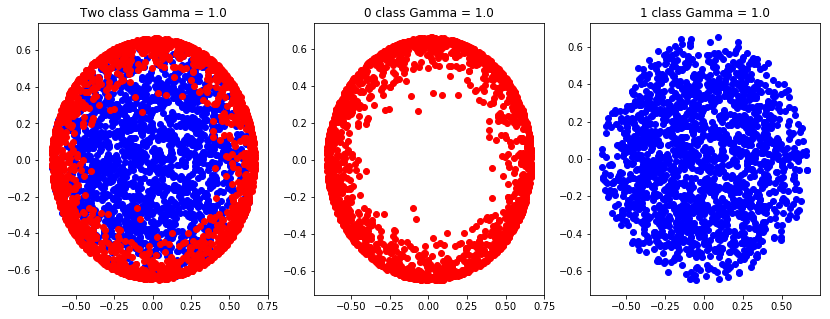

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


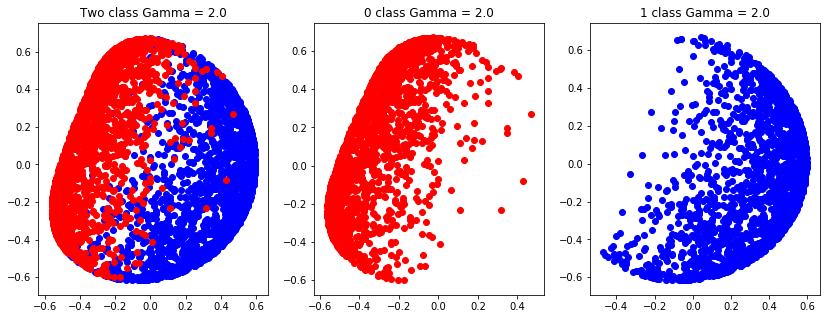

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


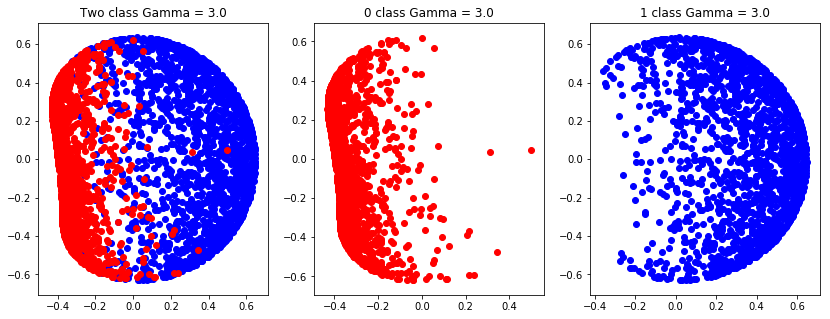

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


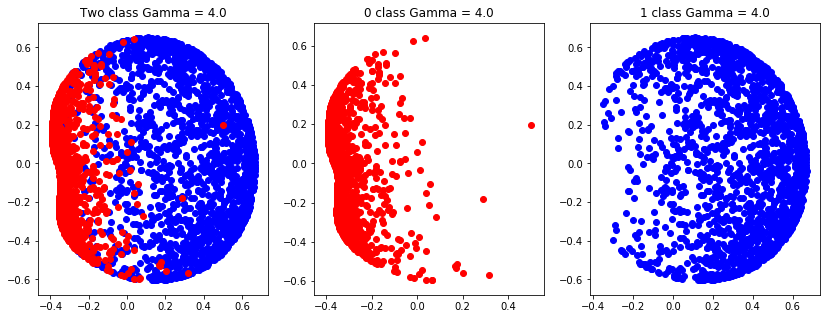

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


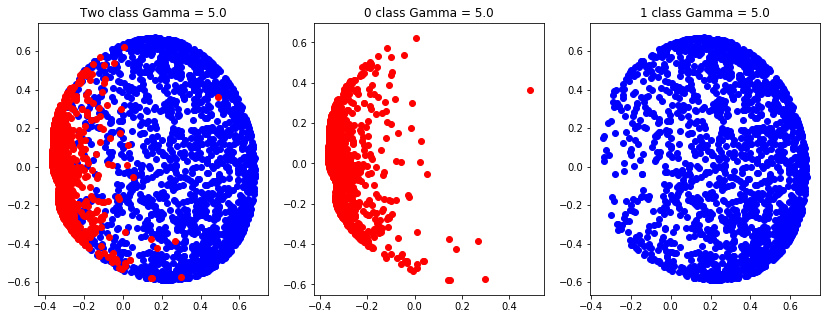

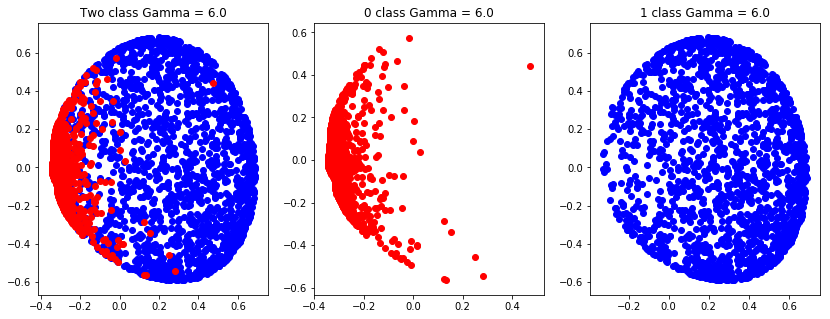

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


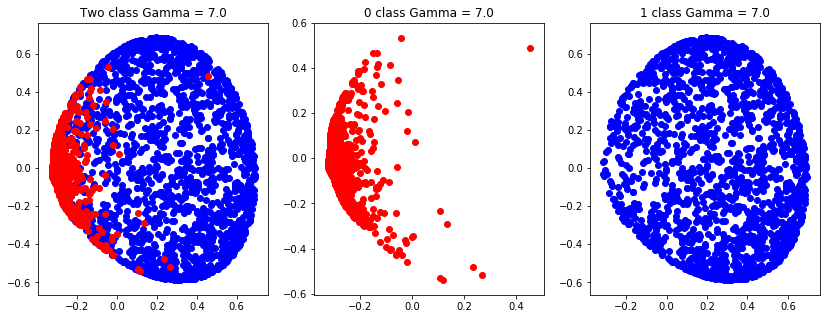

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


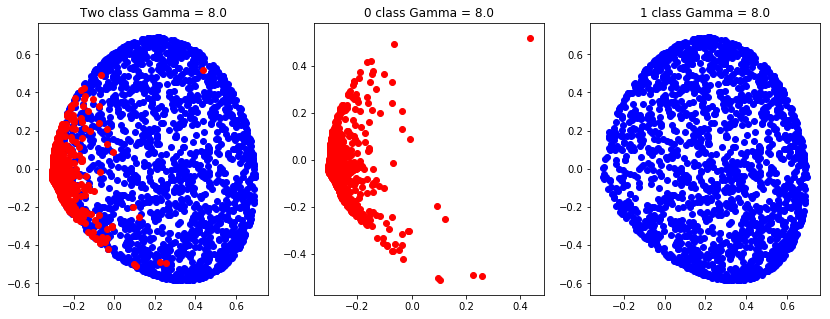

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


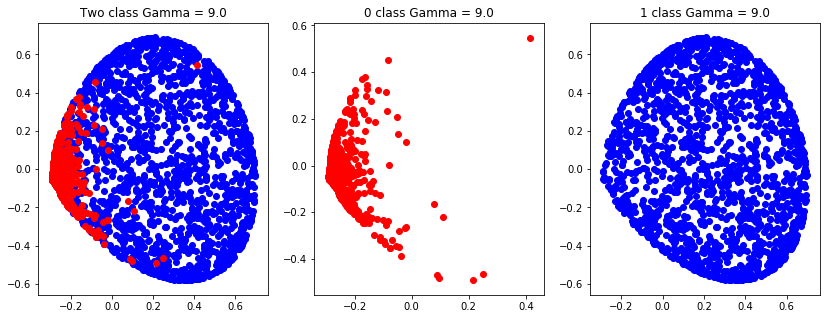

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


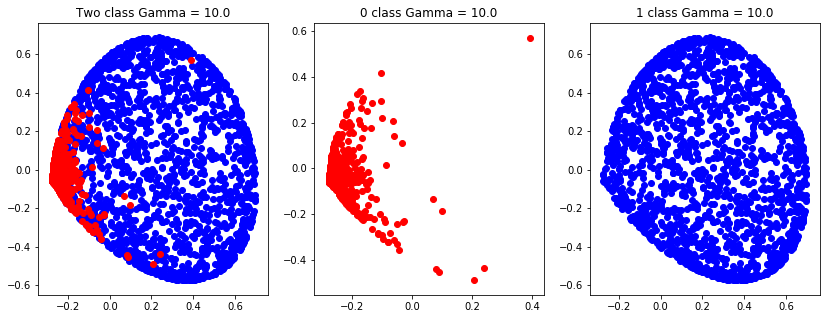

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


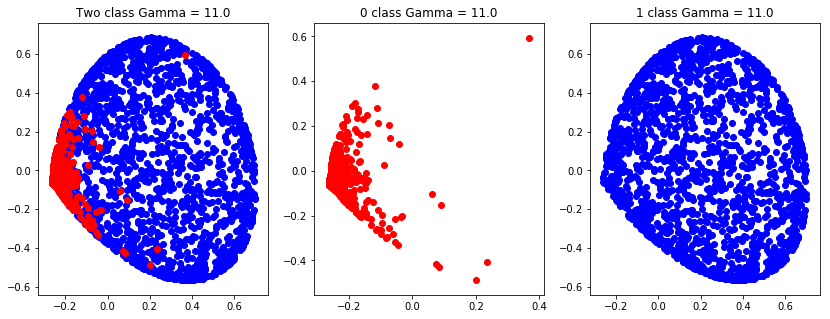

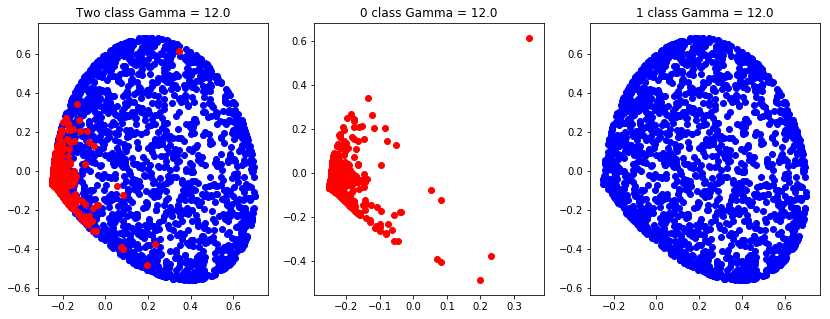

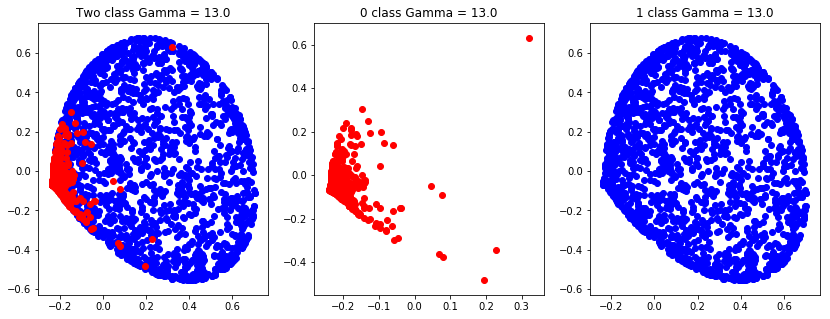

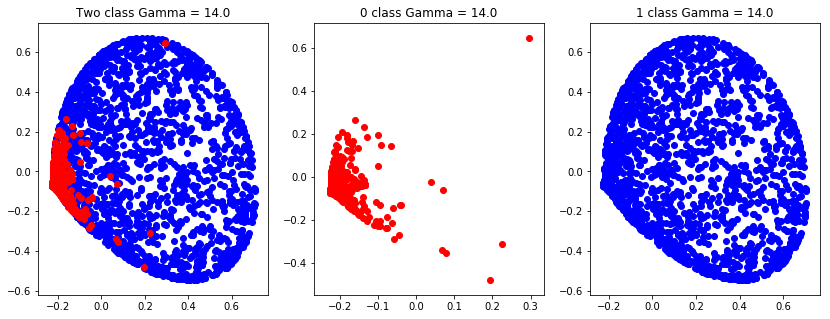

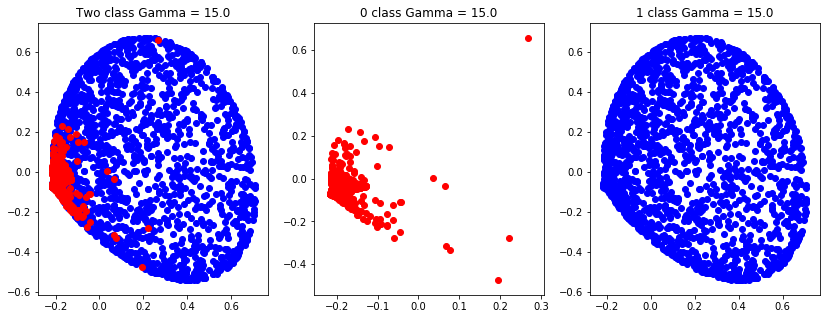

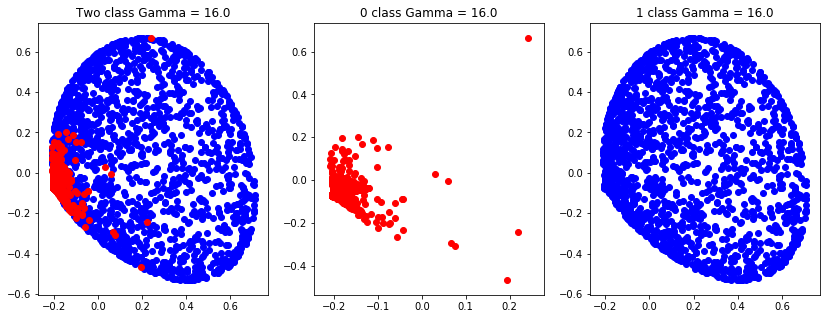

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


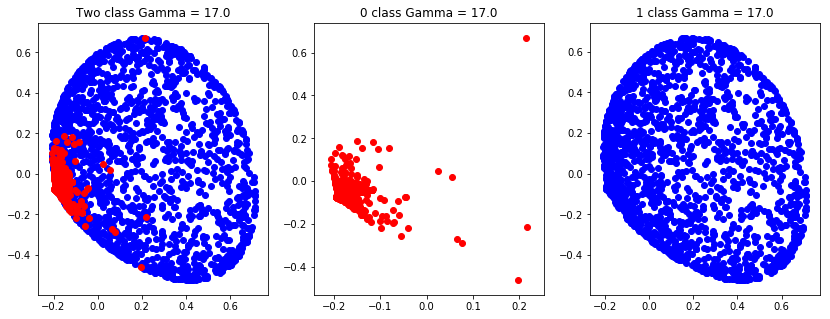

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


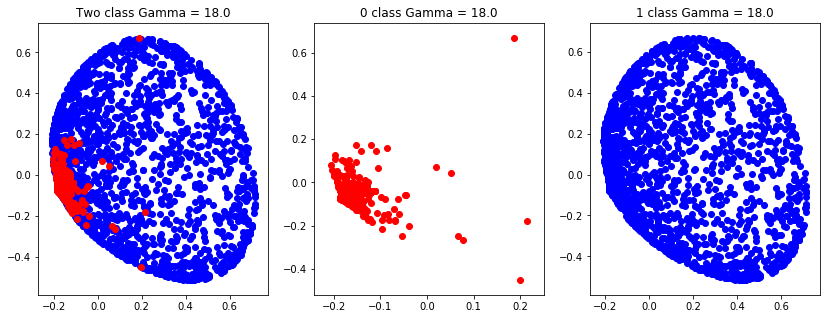

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


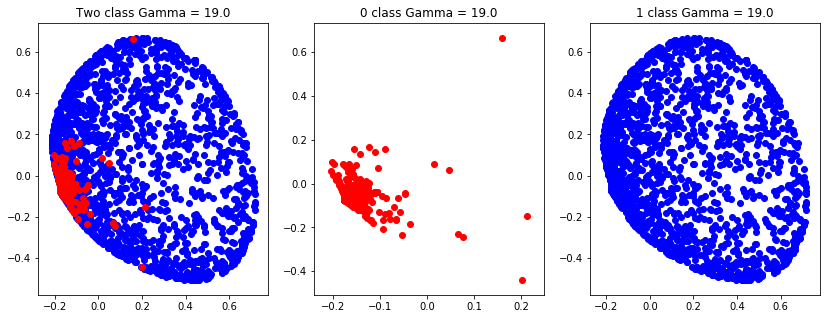

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


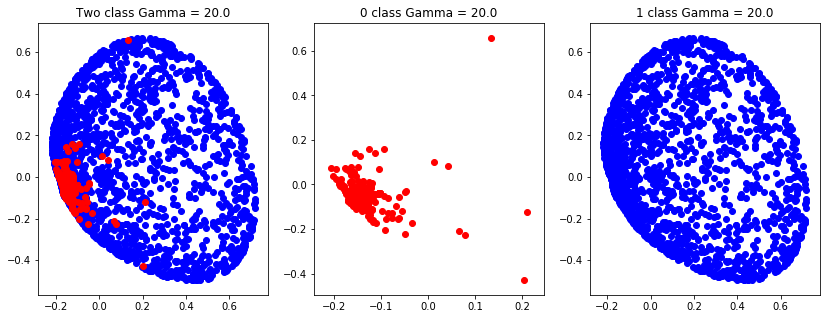

In [0]:
from sklearn.decomposition import KernelPCA

for g in np.linspace(1,20,20):
  ker = KernelPCA(2,kernel='rbf',gamma=g)
  ker.fit(X_train)
  X_ker_train = ker.transform(X_train)
  fig = plt.figure(figsize=(14.,5.))
  fig1 = fig.add_subplot(131)
  fig1.scatter(X_ker_train[y_train==1][:,0], X_ker_train[y_train==1][:,1],c='b')
  fig1.scatter(X_ker_train[y_train==0][:,0], X_ker_train[y_train==0][:,1],c='r')
  fig1.set_title('Two class Gamma = '+str(g))
  
  fig2 = fig.add_subplot(132)
  fig2.scatter(X_ker_train[y_train==0][:,0], X_ker_train[y_train==0][:,1],c='r')
  fig2.set_title('0 class Gamma = '+str(g))

  fig3 = fig.add_subplot(133)
  fig3.scatter(X_ker_train[y_train==1][:,0], X_ker_train[y_train==1][:,1],c='b')
  fig3.set_title('1 class Gamma = '+str(g))
  
  plt.show()

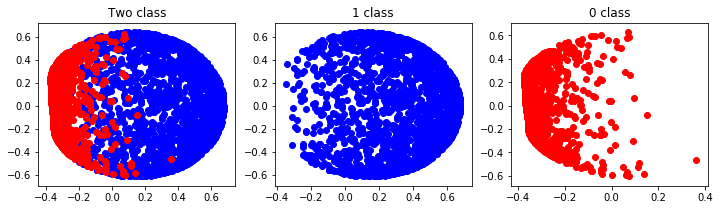

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


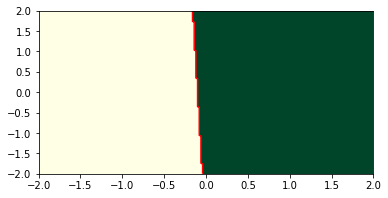

0.9606666666666667


In [0]:
# Datos transformados



X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
ker = KernelPCA(2,kernel='rbf',gamma=4)
ker.fit(X_train)
X_transf = ker.transform(X_train)
X_test_t = ker.transform(X_test)

# Plot
fig = plt.figure(figsize=(12.,3.))
fig1 = fig.add_subplot(131)
fig1.scatter(X_transf[y_train==1][:,0], X_transf[y_train==1][:,1],c='b')
fig1.scatter(X_transf[y_train==0][:,0], X_transf[y_train==0][:,1],c='r')
fig1.set_title('Two class')

fig2 = fig.add_subplot(132)
fig2.scatter(X_transf[y_train==1][:,0], X_transf[y_train==1][:,1],c='b')
fig2.set_title('1 class')

fig3 = fig.add_subplot(133)
fig3.scatter(X_transf[y_train==0][:,0], X_transf[y_train==0][:,1],c='r')
fig3.set_title('0 class')

plt.show()
# Regresion logística
log_reg = LogisticRegression()
log_reg.fit(X_transf, y_train)
score = log_reg.score(X_test_t,y_test)
plot_classifier(log_reg,X_transf,y_train,X_test_t,y_test,'Boundary')
print(score)




##### Kernel
El método de kernel se ve que separa, con el gamma adecuado, los datos de una mejor manera para atacar el problema linealmente. Se puede apreciar que el gamma, entre más aumenta, como que tiende a juntar los datos sobretodo de una clase. 

Los valores de regresión lineal se vieron mejoras eng ran medida, debido a la nueva distribución de los datos (o transformación de ellos). Dando una buena frontera de decisión y buen desempeño la regresión logística. 

#### 1.i Manualmente
Como nosotros conocemos como se generaron los datos tenemos una ventaja sobre los modelos. Genere una transformación de los datos que estime conveniente para obtener datos linealmente separables. Puede aumentar o disminuir la dimensión a gusto, por ejemplo puede realizar algo del estilo $(x,y)\longrightarrow (x+y)$, ó $(x,y)\longrightarrow (x,y,x+y,x-y)$. Apoyese de las carácteristicas geométricas del conjunto de datos y justifique sus elecciónes con gráficos adecuados. 

Luego entrene un regresor logístico sobre sus datos transformados y comente sobre la utilidad de conocer cómo se generaron los datos. Grafíque los datos transformados o alguna proyección de ellos junto con la frontera de desición y comente sobre lo que realiza su transformación.

In [0]:
# Datos transformados
X_train, X_test, y_train, y_test = do_circles(5000,0.2,0.3,1)
X_transf = np.zeros(X_train.shape)
X_transf[:,0] = np.sqrt(X_train[:,0]**2 + X_train[:,1]**2 )
X_transf[:,1] = phi = np.arctan2(X_train[:,1], X_train[:,0])
X_test_t = np.zeros(X_test.shape)
X_test_t[:,0] = np.sqrt(X_test[:,0]**2 + X_test[:,1]**2 )
X_test_t[:,1] = phi = np.arctan2(X_test[:,1], X_test[:,0])

# Plot
fig = plt.figure(figsize=(12.,3.))
fig1 = fig.add_subplot(131)
fig1.scatter(X_transf[y_train==1][:,0], X_transf[y_train==1][:,1],c='b')
fig1.scatter(X_transf[y_train==0][:,0], X_transf[y_train==0][:,1],c='r')
fig1.set_title('Two class')

fig2 = fig.add_subplot(132)
fig2.scatter(X_transf[y_train==1][:,0], X_transf[y_train==1][:,1],c='b')
fig2.set_title('1 class')

fig3 = fig.add_subplot(133)
fig3.scatter(X_transf[y_train==0][:,0], X_transf[y_train==0][:,1],c='r')
fig3.set_title('0 class')

plt.show()
# Regresion logística
log_reg = LogisticRegression()
log_reg.fit(X_transf, y_train)
score = log_reg.score(X_test_t,y_test)
plot_classifier(log_reg,X_transf,y_train,X_test_t,y_test,'Boundary')
print(score)



##### Transformación de datos bajo conocimiento del dominio
Al ser circunferencia se puede llevar a coordenadas polares, la cual muestra una notable mejoria a la hora de trabajar bajo regresión. Igual se puede ver que las clases están mucho más separables linealmente. Al ser dos cincurferencias se repetirán los ángulos pero la variable importante que da la característica de separación lineal es el radio de las coordenadas, aunque no evita el problema del solapamiento de algunos puntos debido al ruido. 

<a id="tercero"></a>
## 2. Regularización para regresión. 

Un problema que podemos encontrar transversalmente a todos los modelos es el problema del _overfitting_. Este problema consiste en un modelo que aprende demasiado bien los datos de ejemplo o entrenamiento, al punto que al momento de ver ejemplos desconocidos o de validación, baja su desempeño respecto a un modelo "menos entrenado". En algunos casos podriamos decir que el modelo "aprende de memoria" los ejemplos, en vez de intentar obtener información generalizable a partir de su entrenamiento. Para el caso de la regresión, una de las aproximaciones más comunes para tratar de mitigar este efecto es el de la regularización. Agregando una penalización a la norma de los parametros de la regresión podemos restringir la eficiencia del modelo al momento de aprender los datos de entrenamiento, incluso forzando dependiendo de la intensidad de la regularización que algunos parametros se vuelvan cero. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:13.9cm;"  />

En esta pregunta utilizaremos nuevamente la base de datos de precios de casas en King County, https://www.kaggle.com/harlfoxem/housesalesprediction, que utilizamos en la Tarea 1. Utilizaremos estos datos ya conocidos y analizados anteriormente para enfocarnos en la regularización para regresión. Exploraremos como varian los distintos errores de predicción y como cambian los valores de los parámetros ajustados por el modelo para distintos valores del coeficiente de regularización, para tratar de entender que ocurre con las distintas regularizaciones y sus diferencias. 

#### 2.a Carga y preprocesamiento.
Cargue y preprocese los datos de la misma forma en que lo realizó en la tarea 1, incluyendo estandarizar el _target_. Puede reciclar sus códigos y agregar modificaciones que le parezcan pertinentes.  Para esta parte utilize 0.5 de los datos como _training set_, 0.3 como _validation set_ y 0.2 como _test set_.

#### 2.b Modelo sin regularización
Entrene un modelo de regresión lineal no regularizado con los datos preprocesados. Calcule el error cuadrático medio (MSE) del modelo para el conjunto de validación y el de entrenamiento. 

In [0]:
regressor = LinearRegression()
regressor.fit(# . . . )
    
mse = ((reg.predict(x_val)-y_val)**2).mean()

#### 2.c Regularización
Discuta que busca realizar (en términos del ajuste de los parámetros del modelo de regresión lineal) la regularización de _Lasso_. ¿Por qué se habla de penalización en norma $L^1$? Apóyese de ecuaciones. ¿Qué importancia tiene el parámetro de regularización $\lambda$? 

¿Qué diferencia hay entre _Lasso_ y _Ridge_? 

#### 2.d Influencia sobre el error
Grafique como varia el error de entrenamiento y el error de validación a medida se cambia el valor del parámetro $\lambda$. Para esto debe entrenar un modelo para cada uno de los parámetros que considerará en el gráfico y calcular el MSE para ambos sets. Comente sobre lo que ve en el gráfico y si lo encuentra pertinente puede calcular en más detalle alguna zona que le parezca interesante. 
Es conveniente entrenar primero unos cuantos modelos con valores de $\lambda$ escogidos manualmente para saber mejor en que intervalo resulta pertinente calcular estos valores (para _Ridge_ se necesitan valores más altos en este caso para ver la influencia sobre el error).

Note que el parámetro $\lambda$ es sensible a la escala de los datos, por lo cual deberá estudiar valores distintos dependiendo de si estandarizó el _target_ o no. 

In [0]:
# for example:
MSE_list = []
space = pd.np.logspace(-2,1,100)
for lambd in space:
    model = Lasso(alpha=lambd)
    # fit, error...
# . . . 
# plt.plot( space, MSE_list, . . . ) 

#### 2.e Influencia sobre los coeficientes
Grafique ahora como se comporta el valor de los coeficientes del modelo lineal en el modelo entrenado a medida crece $\lambda$, tanto para _Lasso_ como para _Ridge_. Para esto entrene un modelo para cada valor de $\lambda$ y guarde sus coeficientes, como propone el princio de código a continuación. Debe explorar valores de $\lambda$ donde todos los coeficientes sean no nulos hasta valores donde todos los coeficientes se anulan. 

¿Qué diferencias ve entre _Ridge_ y _Lasso_? ¿Coincide este comportamiento con lo que esperaría teóricamente de cada uno de los modelos? 

¿Podemos utilizar estos gráficos para discutir sobre la cantidad de información que entrega cada uno de los atributos para predecir el _target_? ¿Cual de ambos (_Ridge_ o _Lasso_) le parece mejor para este tipo de discución? Compare lo que muestran estos gráficos con alguna otra aproximación para medir la significancia de cada atributo (como correlación o _mutual information_ por ejemplo) y discuta. 

In [0]:
space = pd.np.linspace(0.0001,3,100) 
# should be fine for Lasso, for Ridge try space = pd.np.logspace(0,10,50) and plot x on a logarithmic
# scale (you can simply do np.linspace(0,10,50) when setting x values for the plot)
coefs = []
for l in space:
    model = # . . .
    
    # . . .
    
    coefs.append(model.coef_)

for y_arr, label in zip(pd.np.squeeze(coefs).T, x_cols):
    plt.plot(space, y_arr, label=label)
    # . . .

#### 2.f K-_fold_ sobre $\lambda$
Realice 5-_fold_ o 10-_fold_ sobre el parámetro de regularización $\lambda$, ya sea para _Lasso_ o _Ridge_. Explore a lo menos 20 valores distintos de $\lambda$ en un intervalo relevante luego de lo aprendido en las preguntas anteriores. Utilice MSE como el error a minimizar. 

Compare el error de entrenamiento y de validación para este modelo respecto al modelo lineal sin regularización entrenado inicialmente. ¿En su opinión se alcanza a apreciar el fenomeno de _overfitting_ para este conjunto de datos y el modelo logístico? 

#### 2.g _Grid search_ para SVM

Para terminar, comparemos el desempeño de los métodos lineales con un método no lineal, las SVM. Para esto buscaremos ajustar los hiperparámetros más relevantes del modelo, en este caso el parámetro `C` y `epsilon`, la penalización y el margen de holgura. Comente sobre la significancia de estos parámetros y su influencia sobre la máquina. Luego realice una busqueda en un mallado de estos parámetros, evaluando el _score_ (coeficiente de determinación) o MSE o ambos.

*Nota*: Entrenar una SVM toma mucho más tiempo que las regresiones lineales, por lo cual es recomendable probar primero su código en un número reducido de puntos y luego entrenar todos los modelos asegurandose de guardar bien los resultados. Si su maquina es muy lenta es incluso recomendable que esta parte la realice en _Collab_ de Google si desea explorar un número relevante de puntos. El mallado propuesto en el código es de referencia y puede elegirlo o construirlo como usted estime más conveniente. 

De todos los modelos entrenados, ¿Cuál es el mejor? ¿Cómo se compara el desempeño de este modelo con el mejor modelo lineal encontrado por usted? Adjunte gráficos que le parezcan relevantes. 

In [0]:
from sklearn.svm import SVR

Cs, epsilons = pd.np.meshgrid([i for i in range(1,10)],[i/20 for i in range(1,21)])
for for C, epsilon in zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1))):
    sv = SVR(C=C, epsilon=epsilon)
    
    # fit and save the scores for each one